# Make a classifier
Using data from the Spotify API, train a classifier to recognize taylor swift vs beyonce

# 1. Getting some data

## 1.1 Load a dataset
First, read the `.csv` files located on `python_scratch` path (on google drive) as a `pandas` dataframe. If possible, use the following variables to load the dataframes into: 
- `df_taylor` will have all of taylor swift's data
- `df_beyonce` will have all of beyonce's data

In [ ]:
from google.colab import drive
drive.mount('content')

Mounted at content


In [ ]:
# load pandas and your data: 

import pandas as pd


df_taylor = pd.read_csv("/content/content/MyDrive/Python_Class/taylor.csv")

df_beyonce = pd.read_csv("/content/content/MyDrive/Python_Class/beyonce.csv")


In [ ]:
#@title load dataset SOLVED
import pandas as pd

df_taylor  = pd.read_csv('/content/content/MyDrive/python_scratch/spotify_data/taylor.csv')
df_beyonce = pd.read_csv('/content/content/MyDrive/python_scratch/spotify_data/beyonce.csv')

FileNotFoundError: ignored

## 1.2 Features and Labels

Now, the important part: you need to choose which features to use to train your model. 

### 1.2.0 Look at the data:

In [ ]:
df_taylor.describe()


,Unnamed: 0,album_release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,disc_number,duration_ms,track_preview_url,track_number
count,547.00000,547.000000,547.000000,547.000000,547.000000,547.000000,547.00000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.0,547.000000,0.0,547.000000
mean,274.00000,2011.056673,0.604841,0.584459,5.091408,-7.464894,0.86106,0.184482,0.255136,0.089850,0.201953,0.443340,118.690005,3.859232,1.0,219190.599634,NaN,11.568556
std,158.04957,3.614491,0.108088,0.204999,3.029594,3.372322,0.34620,0.324903,0.315732,0.238696,0.179595,0.199502,30.223539,0.574426,0.0,74271.403845,NaN,8.543165
min,1.00000,2006.000000,0.248000,0.151000,0.000000,-16.380000,0.00000,0.023200,0.000028,0.000000,0.033500,0.049900,47.607000,1.000000,1.0,41769.000000,NaN,1.000000
25%,137.50000,2008.000000,0.542500,0.420500,2.000000,-9.172000,1.00000,0.029450,0.014000,0.000000,0.105000,0.272500,95.389000,4.000000,1.0,203040.000000,NaN,5.000000
50%,274.00000,2010.000000,0.604000,0.623000,5.000000,-6.684000,1.00000,0.035800,0.085000,0.000000,0.137000,0.443000,117.970000,4.000000,1.0,232120.000000,NaN,10.000000
75%,410.50000,2014.000000,0.680500,0.758000,7.000000,-4.914000,1.00000,0.071150,0.460500,0.000211,0.220000,0.588500,140.973500,4.000000,1.0,250033.000000,NaN,15.000000
max,547.00000,2017.000000,0.857000,0.950000,11.000000,-2.020000,1.00000,0.957000,0.983000,0.912000,0.946000,0.963000,204.125000,5.000000,1.0,405906.000000,NaN,46.000000


In [ ]:
df_beyonce.describe()

,Unnamed: 0,album_release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,disc_number,duration_ms,track_number
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,4.380000e+02,438.000000
mean,219.500000,2008.095890,0.579792,0.643451,5.264840,-7.004639,0.728311,0.174515,0.180185,0.013522,0.246296,0.467321,117.535203,3.894977,1.148402,2.428213e+05,7.360731
std,126.583964,2.949604,0.168656,0.198642,3.627154,3.091323,0.445339,0.144211,0.210869,0.085043,0.222992,0.221960,32.090024,0.446622,0.355904,8.039130e+04,4.972465
min,1.000000,2003.000000,0.143000,0.017200,0.000000,-27.631000,0.000000,0.027100,0.000066,0.000000,0.016200,0.038800,63.345000,1.000000,1.000000,1.636000e+04,1.000000
25%,110.250000,2006.250000,0.467250,0.518000,1.000000,-8.085500,0.000000,0.054950,0.025875,0.000000,0.096900,0.272000,93.615000,4.000000,1.000000,2.058130e+05,3.000000
50%,219.500000,2008.000000,0.576000,0.689500,6.000000,-6.590000,1.000000,0.131000,0.094700,0.000005,0.169500,0.472000,107.051000,4.000000,1.000000,2.287795e+05,6.000000
75%,328.750000,2010.000000,0.709750,0.774000,8.000000,-5.154000,1.000000,0.265750,0.247000,0.000157,0.310000,0.647500,137.093500,4.000000,1.000000,2.698230e+05,11.000000
max,438.000000,2014.000000,0.925000,0.994000,11.000000,-2.764000,1.000000,0.837000,0.904000,0.923000,0.983000,0.971000,200.053000,5.000000,2.000000,1.187253e+06,25.000000


### 1.2.1 Features
Choose features for both taylor and beyonce and concatenate them inside a `features` variables. (Make sure these are the same features for both beyonce and taylor)

- use `features` as a variable

In [ ]:
# choose features here:
import numpy as np

taylor_train_feats = df_taylor[['speechiness', 'acousticness', 'danceability']]
beyonce_train_feats = df_beyonce[['speechiness', 'acousticness', 'danceability']]
# stack features up, mozart first, salieri second
features = np.vstack((taylor_train_feats,beyonce_train_feats))



In [ ]:
#@title feature selection SOLVED
import numpy as np
f_taylor = df_taylor[['danceability', 'energy', 'loudness', 'speechiness', 'valence', 'liveness']]
f_beyonce = df_beyonce[['danceability', 'energy', 'loudness', 'speechiness', 'valence', 'liveness']]
features = np.concatenate([f_taylor,f_beyonce])
f_taylor.shape, f_beyonce.shape, features.shape

((547, 6), (438, 6), (985, 6))

### 1.2.2 Labels
You also need to make your `labels` variable. The length of the labels must be the same lenght as the rows of the feature variable.

- use `labels` as a variable
- fill in ZEROS for taylor and ONES for beyonce using `np.zeros` and `np.ones`

In [ ]:
# make labels here:

labels = np.concatenate((
    np.zeros(len(taylor_train_feats)), # an array of ZEROS for taylor
    np.ones(len(beyonce_train_feats))  # an array of ONES for beyonce
    ))

In [ ]:
#@title labels SOLVED
labels = np.concatenate([np.zeros(f_taylor.shape[0]),np.ones(f_beyonce.shape[0])])
labels.shape, labels[0], labels[-1]

((985,), 0.0, 1.0)

#  2. Split data into Train and Test sets
You can choose how much of the dataset goes to the test set and to the train set by the `test_size` parameter 

Use:
- `X_train` for the feature train set
- `y_train` for the train set labels
- `X_test` for the feature test set
- `y_test` fr the test set labels

In [ ]:
# split train and test set here:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, labels)

In [ ]:
#@title split and data SOLVED
from sklearn.model_selection import train_test_split
# if you did things right, this should not give you any errors...
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3)

# 3. Train your model

## 3.1. Load your model

We will use the `SVC` class (aka Support Vector Classifier) available within the `svm` (aka Support Vector Machine) module of the `sklearn` library.

You can fiddle with the `C` and `gamma` parameters, say, by changing them to some value (`C=50, gamma=0.01`), or just leave the defaults (ie., just run `SVC()` without arguments)

Optionally, you can perform a grid search for hyperparameter optimization. (See [below](#gridsearch))

In [ ]:
# load sklearn and your model here:

from sklearn.svm import SVC


practicemodel = SVC()
practicemodel.fit(features, labels)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#@title loading model SOLVED
from sklearn.svm import SVC
m = SVC()

In [ ]:
#features.shape, labels.shape
x_test.shape, y_test.shape

((247, 3), (247,))

## 3.2. Train the model
Run the `fit()` method of the `SVC` class passing as arguments your `X_train` and `y_train` variables, i.e., your feature training set and its labels.

In [ ]:
# fit your model here:



In [ ]:
#@title fit SOLVED
m.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## 3.3 Get your Accuracy score

Run the `score()` method of the `SVC` class with the test set so that you can estimate the model's accuracy

In [ ]:
practicemodel.score(x_test, y_test)

0.8178137651821862

In [ ]:
#@title Accuracy Score SOLVED
m.score(X_test, y_test)

0.5675675675675675

<a name="prediction"></a>
# 4. Make a prediction
To make a prediction, you need to pick a random sample from the feature test set, and run the `predict` method of the `SVC` class (i.e., of your model).

- use the `np.random.randint()` function to get a random integer to index into the test set.

NOTE: You can also use the same random number to index into the test set labels so that you check if your prediction is correct

In [ ]:
# 0 is taylor 1 is beyonce
#  make your prediction here:
rn = np.random.randint(247)
print(practicemodel.predict([x_test[rn]]))

print(y_test[rn])

[0.]
0.0


In [ ]:
#@title prediction SOLVED
from termcolor import colored
example = np.random.randint(len(X_test))

def name(a):
    if a:
        return f"{a} ==> Beyonce"
    else: 
        return f"{a} ==> Taylor"
y_true = y_test[example]
y_pred = m.predict([X_test[example]])[0]

if y_true != y_pred:
    msg = "Yikes!, Nice try."
    color='red'
else:
    msg = "Knew it. I'm done!"
    color='green'

print(colored("="*80, color))
print(colored("| "+msg, color))
print(colored("-"*80, color))
print(colored("| TRUE: "+name(y_true), color))
print(colored("| PRED: "+name(y_pred), color))
print(colored("="*80, color))

| Knew it. I'm done!
--------------------------------------------------------------------------------
| TRUE: 0.0 ==> Taylor
| PRED: 0.0 ==> Taylor


<a name="gridsearch"></a>

# 5. Grid Search for best parameters (Optional)

In here you will first run the grid search, and then you need to make sure you use the best model that is returned from the search.

## 5.1 Grid search
To perform a grid search, you need to load the `GridSearchCV` class from the `model_selection` module of the `sklearn` library.
  1. Make a dictionary holding two keys `C` and `gamma`, whose values will be arrays holding something like `[10,   50,   25,    75    ]` for the former, and `[0.05, 0.01, 0.001, 0.0055]`. 
  2. Instantiate the `GridSearchCV` class with two arguments: the first is your model, the second is the dictionary we just made. You can also pass a `verbose=1` parameter. See the [User Guide](https://scikit-learn.org/stable/modules/grid_search.html#grid-search) for more information. Make sure you store the instantiation in a variable such as, e.g., `grid = GridSearchCV(...)`
  3. Then, you can call the `fit` method, as if it were our model, and pass in the test features and labels
  4. After a while, you get some printouts, and you can now ask from your `grid` class, the attribute `grid.best_estimator_`, which is **the best model your grid could found given those parameters**.
  5. Finally, you can ask for the `score` method of such best model, and compare to your previous result without grid searching 


In [ ]:
# perform a grid search here:




In [ ]:
#@title grid search SOLVED
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'C':     [10,   50,   25,    75    ], 
    'gamma': [0.05, 0.01, 0.001, 0.0055] 
    }

grid = GridSearchCV(m, param_grid, verbose=1) 
grid.fit(X_train, y_train)
m = grid.best_estimator_
best_score = m.score(X_test, y_test)
print("---------------")
print("BEST PARAMETERS:", grid.best_params_)
print("Best Score:", best_score)
print("---------------")


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


---------------
BEST PARAMETERS: {'C': 75, 'gamma': 0.05}
Best Score: 0.8006756756756757
---------------


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    1.3s finished


## 5.2. Run a prediction again
Now that you have your best parameters, and a good score, you can predict the model again and test the model for yourself. [Go back to 4](#prediction)



# 6. Interpreting Results
You can now make a classification report and a confusion matrix

## 6.1 Classification Report

For the report, you need to call the `classification_report` function of the `metrics` module within the `sklearn` library.

Then, you need to:
1. run a prediction using the test set
2. run the `classification_report` function with: 

    - the true labels of the test set (arg 1)
    - the predicted labels of the entire test set (arg 2)
    - the two names of the labes using the `target_names=` parameter


3. finally, you `print` the report to screen

In [ ]:
# classification report goes here:



In [ ]:
#@title classification report SOLVED
from sklearn.metrics import classification_report

# run prediction on all TEST features
yfit = m.predict(X_test)

# TEST labels as names
names = ["Taylor", "Beyonce"]

# compute report on TEST prediction, passing the TEST (true) labels
report = classification_report(
                                y_test,            # true labels
                                yfit,              # predicted labels
                                target_names=names # test labels as names
                               )
print(report)

              precision    recall  f1-score   support

      Taylor       0.77      0.92      0.84       165
     Beyonce       0.87      0.65      0.74       131

    accuracy                           0.80       296
   macro avg       0.82      0.79      0.79       296
weighted avg       0.81      0.80      0.80       296



## 6.2 Confusion Matrix
 
To make a confusion matrix, you need to import the `confusion_matrix` function from the `metrics` module of the `sklearn` library.

You will also need to import other plotting libraries `matplotlib.pyplot` and `seaborn` for the `heatmap()` function

1. Pass the true labels and the predicted labels to the `confusion_matrix` function. This function returns a matrix, call it `mat`
2. Run the `heatmap` function with the resultin `mat` matrix (NOTE: you will need to *transpose* this matrix for it to work, so better use `mat.T`. 
3. Useful parameters for the `heatmap` function are:
```python
square=True # so it's a nice square
annot=True  # so we can read the values on the cells
cbar=True   # so we have some color bar for reference
fmt='d'     # nice and round integers
xticklabels=[] # arrays with the names of our labels
yticklabels=[] # arrays with the names of our labels
```

In [ ]:
# make a confusion matrix here:



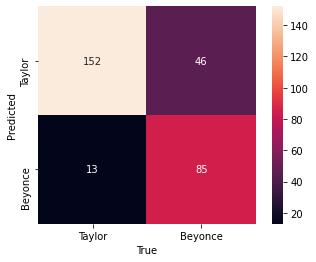

In [ ]:
#@title confusion matrix SOLVED
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

mat = confusion_matrix(y_test, yfit)

sns.heatmap(mat.T, square=True, annot=True, cbar=True, fmt='d',
            xticklabels=["Taylor", "Beyonce"],
            yticklabels=["Taylor", "Beyonce"])

plt.xlabel('True')
plt.ylabel('Predicted');

# 8. Extra

Now you can think of ways of extending this binary classifier with more than 2 groups: could we add nirvanna, rolling stones and beatles to the mix and see if we can tell nirvana from taylor swift? 

